In [370]:
from OSMPythonTools.api import Api
from OSMPythonTools.nominatim import Nominatim
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass
from OSMPythonTools.data import Data, dictRangeYears, ALL
import geopandas as gpd
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
ox.config(log_file=True, log_console=True, use_cache=True)

In [324]:
nominatim = Nominatim()
areaId = nominatim.query('Metro Manila,Philippines').areaId()

In [346]:
overpass = Overpass()
query = overpassQueryBuilder(area=areaId, elementType='relation', selector='"admin_level"="10"', includeGeometry=True,out='body')
result = overpass.query(query)
result.countElements()

892

In [347]:
result.elements()[0].tags()

{'admin_level': '10',
 'boundary': 'administrative',
 'name': 'Urdaneta',
 'population': '4429',
 'population:date': '2015-08-01',
 'ref': '137602030',
 'source:population': 'Philippine Statistics Authority',
 'type': 'boundary'}

In [374]:
df_admin = pd.DataFrame(columns=['id','admin_level','boundary','name','population','date','ref','source','type','geom'])
for y,x in enumerate(result.elements()):
    list1 = []
    try:
        geo = gpd.read_file(str(x.geometry()))['geometry'][0]
        df_admin.loc[y] = [x.id(),x.tag('admin_level'),x.tag('boundary'),
                          x.tag('name'),x.tag('population'),x.tag('date'),x.tag('ref'),x.tag('source'),
                          x.tag('type'),geo]
    except:
        print(x.tag('name'))
        pass

[OSMPythonTools.Element] Cannot build geometry: cannot close ring.
NoneType: None
[OSMPythonTools.Element] Cannot build geometry: cannot close ring. (relation/3282361)
Traceback (most recent call last):
  File "C:\Users\Ralph Caubalejo\anaconda3\lib\site-packages\OSMPythonTools\element.py", line 133, in geometry
    ringsOuter = self.__geometry_buildRings(membersOuter)
  File "C:\Users\Ralph Caubalejo\anaconda3\lib\site-packages\OSMPythonTools\element.py", line 209, in __geometry_buildRings
    self._raiseException('Cannot build geometry: cannot close ring.')
  File "C:\Users\Ralph Caubalejo\anaconda3\lib\site-packages\OSMPythonTools\element.py", line 20, in _raiseException
    OSMPythonTools._raiseException('Element', msg)
  File "C:\Users\Ralph Caubalejo\anaconda3\lib\site-packages\OSMPythonTools\__init__.py", line 13, in _raiseException
    raise(Exception(msgComplete))
Exception: [OSMPythonTools.Element] Cannot build geometry: cannot close ring.


Talon Dos


[OSMPythonTools.Element] Cannot build geometry: cannot close ring.
NoneType: None
[OSMPythonTools.Element] Cannot build geometry: cannot close ring. (relation/6306175)
Traceback (most recent call last):
  File "C:\Users\Ralph Caubalejo\anaconda3\lib\site-packages\OSMPythonTools\element.py", line 133, in geometry
    ringsOuter = self.__geometry_buildRings(membersOuter)
  File "C:\Users\Ralph Caubalejo\anaconda3\lib\site-packages\OSMPythonTools\element.py", line 209, in __geometry_buildRings
    self._raiseException('Cannot build geometry: cannot close ring.')
  File "C:\Users\Ralph Caubalejo\anaconda3\lib\site-packages\OSMPythonTools\element.py", line 20, in _raiseException
    OSMPythonTools._raiseException('Element', msg)
  File "C:\Users\Ralph Caubalejo\anaconda3\lib\site-packages\OSMPythonTools\__init__.py", line 13, in _raiseException
    raise(Exception(msgComplete))
Exception: [OSMPythonTools.Element] Cannot build geometry: cannot close ring.


Bagumbayan


[OSMPythonTools.Element] Cannot build geometry: cannot close ring.
NoneType: None
[OSMPythonTools.Element] Cannot build geometry: cannot close ring. (relation/10988111)
Traceback (most recent call last):
  File "C:\Users\Ralph Caubalejo\anaconda3\lib\site-packages\OSMPythonTools\element.py", line 133, in geometry
    ringsOuter = self.__geometry_buildRings(membersOuter)
  File "C:\Users\Ralph Caubalejo\anaconda3\lib\site-packages\OSMPythonTools\element.py", line 209, in __geometry_buildRings
    self._raiseException('Cannot build geometry: cannot close ring.')
  File "C:\Users\Ralph Caubalejo\anaconda3\lib\site-packages\OSMPythonTools\element.py", line 20, in _raiseException
    OSMPythonTools._raiseException('Element', msg)
  File "C:\Users\Ralph Caubalejo\anaconda3\lib\site-packages\OSMPythonTools\__init__.py", line 13, in _raiseException
    raise(Exception(msgComplete))
Exception: [OSMPythonTools.Element] Cannot build geometry: cannot close ring.


Maharlika Village


In [375]:
gdf = gpd.GeoDataFrame(df_admin, geometry=df_admin.geom)
gdf

,id,admin_level,boundary,name,population,date,ref,source,type,geom,geometry
0,103686,10,administrative,Urdaneta,4429,None,137602030,None,boundary,"POLYGON ((121.029347 14.550248, 121.032237 14....","POLYGON ((121.02935 14.55025, 121.03224 14.552..."
1,103690,10,administrative,San Lorenzo,12995,None,137602025,None,boundary,"POLYGON ((121.024377 14.55468, 121.025101 14.5...","POLYGON ((121.02438 14.55468, 121.02510 14.554..."
2,103701,10,administrative,Bel-Air,23685,None,137602002,None,boundary,"POLYGON ((121.039019 14.562929, 121.039254 14....","POLYGON ((121.03902 14.56293, 121.03925 14.562..."
3,103702,10,administrative,San Antonio,16840,None,137602023,None,boundary,"POLYGON ((121.013166 14.566395, 121.0133 14.56...","POLYGON ((121.01317 14.56639, 121.01330 14.566..."
4,103729,10,administrative,Bangkal,21650,None,137602001,None,boundary,"POLYGON ((121.019535 14.542065, 121.019395 14....","POLYGON ((121.01954 14.54206, 121.01940 14.542..."
...,...,...,...,...,...,...,...,...,...,...,...
887,11378983,10,administrative,Barangay 166,None,None,None,None,boundary,"POLYGON ((120.972841 14.626645, 120.973262 14....","POLYGON ((120.97284 14.62664, 120.97326 14.626..."
888,11378984,10,administrative,Barangay 168,None,None,None,None,boundary,"POLYGON ((120.97024 14.62718, 120.970388 14.62...","POLYGON ((120.97024 14.62718, 120.97039 14.627..."
889,11378985,10,administrative,Barangay 170,None,None,None,None,boundary,"POLYGON ((120.968291 14.627079, 120.968638 14....","POLYGON ((120.96829 14.62708, 120.96864 14.626..."
890,11378986,10,administrative,Barangay 134,None,None,None,None,boundary,"POLYGON ((120.965265 14.630182, 120.964611 14....","POLYGON ((120.96527 14.63018, 120.96461 14.629..."


In [376]:
gdf['centroid']= gdf.centroid

In [422]:
place = 'Metro Manila, Philippines'
tags = {'power':'substation'}
df_subs = ox.geometries_from_place(place, tags)
df_subs = df_subs.query('element_type=="way"')

In [423]:
gdf_subs = gpd.GeoDataFrame(df_subs, geometry=df_subs.geometry)
gdf_subs.head()

,unique_id,osmid,element_type,barrier,geometry,name,operator,power,frequency,location,...,addr:street,building,disused,gas_insulated,addr:province,fixme,description,ways,alt_name,type
13,way/30331256,30331256,way,NaN,"POLYGON ((121.02081 14.53771, 121.02112 14.537...",Magallanes Substation,Meralco,substation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,way/30618817,30618817,way,NaN,"POLYGON ((120.99821 14.58017, 120.99816 14.580...",Paco Substation,Meralco,substation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,way/30679817,30679817,way,NaN,"POLYGON ((120.99066 14.61268, 120.99058 14.612...",Sampaloc Substation,Meralco,substation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,way/31489448,31489448,way,NaN,"POLYGON ((121.07499 14.63404, 121.07535 14.633...",Marikina Substation,MERALCO,substation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,way/33302915,33302915,way,NaN,"POLYGON ((121.02998 14.55120, 121.02991 14.551...",Urdaneta Substation,Meralco,substation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [424]:
gdf_subs['subs'] = gdf_subs.centroid

C:\Users\Ralph Caubalejo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


<AxesSubplot:>

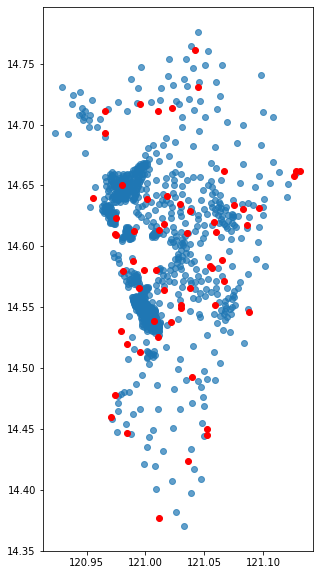

In [425]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
gdf['centroid'].plot(ax=ax,alpha=0.7)
gdf_subs['subs'].plot(ax=ax,color='red')

In [426]:
gdf_subs

,unique_id,osmid,element_type,barrier,geometry,name,operator,power,frequency,location,...,building,disused,gas_insulated,addr:province,fixme,description,ways,alt_name,type,subs
13,way/30331256,30331256,way,NaN,"POLYGON ((121.02081 14.53771, 121.02112 14.537...",Magallanes Substation,Meralco,substation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (121.02138 14.53764)
14,way/30618817,30618817,way,NaN,"POLYGON ((120.99821 14.58017, 120.99816 14.580...",Paco Substation,Meralco,substation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (120.99863 14.58055)
15,way/30679817,30679817,way,NaN,"POLYGON ((120.99066 14.61268, 120.99058 14.612...",Sampaloc Substation,Meralco,substation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (120.99046 14.61261)
16,way/31489448,31489448,way,NaN,"POLYGON ((121.07499 14.63404, 121.07535 14.633...",Marikina Substation,MERALCO,substation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (121.07499 14.63431)
17,way/33302915,33302915,way,NaN,"POLYGON ((121.02998 14.55120, 121.02991 14.551...",Urdaneta Substation,Meralco,substation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (121.03022 14.55157)
18,way/35095403,35095403,way,NaN,"POLYGON ((121.09643 14.63135, 121.09660 14.631...",NaN,NaN,substation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (121.09652 14.63128)
19,way/47570428,47570428,way,NaN,"POLYGON ((121.02990 14.54947, 121.02972 14.549...",Meralco Forbes Park Substation,Meralco,substation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (121.02976 14.54940)
20,way/60193935,60193935,way,NaN,"POLYGON ((121.05596 14.58241, 121.05602 14.582...",Shangri-La Substation,Meralco,substation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (121.05616 14.58233)
21,way/86812178,86812178,way,NaN,"POLYGON ((120.98383 14.44611, 120.98453 14.446...",Pamplona Substation,Meralco,substation,NaN,outdoor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (120.98404 14.44650)
22,way/90125781,90125781,way,NaN,"POLYGON ((120.98078 14.57967, 120.98085 14.579...",Ermita Substation,Meralco,substation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (120.98075 14.57956)


In [ ]:
'Paco Substation','Araneta Power Substation','Zapote Substation','Gardner Substation'

In [436]:
df1 = pd.read_csv('datasets/energy/RTD_2021-02-01_2021-04-30_L_LUZON.csv')
df2 = df1.query('PARTICIPANT_ID=="MERALCO"')

ncrsubs = ['2ARANE_T1L1','2BALNT_T1L1','2PACO_T1L1', '2SUCAT_T1L1','2ZAPOT_T1L1']

df3 = df2[df2['RESOURCE_ID'].isin(ncrsubs)]

In [437]:
df3[:20]

,DELIVERY_DATE,DELIVERY_HOUR,REGION_ID,TYPE_ID,PARTICIPANT_ID,RESOURCE_ID,MW,PRICE
23,02/01/2021,1.0,LUZON,LD,MERALCO,2ARANE_T1L1,214.1,1260.68
24,02/01/2021,1.0,LUZON,LD,MERALCO,2BALNT_T1L1,418.3,1258.04
26,02/01/2021,1.0,LUZON,LD,MERALCO,2PACO_T1L1,246.9,1261.22
27,02/01/2021,1.0,LUZON,LD,MERALCO,2SUCAT_T1L1,303.1,1254.04
28,02/01/2021,1.0,LUZON,LD,MERALCO,2ZAPOT_T1L1,420.8,1248.84
284,02/01/2021,2.0,LUZON,LD,MERALCO,2ARANE_T1L1,200.2,926.55
285,02/01/2021,2.0,LUZON,LD,MERALCO,2BALNT_T1L1,403.6,924.72
287,02/01/2021,2.0,LUZON,LD,MERALCO,2PACO_T1L1,243.9,926.93
288,02/01/2021,2.0,LUZON,LD,MERALCO,2SUCAT_T1L1,306.6,921.65
289,02/01/2021,2.0,LUZON,LD,MERALCO,2ZAPOT_T1L1,400.2,917.77


In [427]:
subs1 = dict({'Araneta substation':'102682009',
'Balintawak substation':'2412468',
'Paco substation':'30618817',
'Sucat substation': '441813417',
'Zapote substation':'149967511',})

In [438]:
list1 = ['Paco Substation','Araneta Power Substation','Zapote Substation','Gardner Substation']

In [460]:
gdf_prime1 = gdf_subs[gdf_subs['name'].isin(list1)]
gdf_prime2 = gdf_subs[~gdf_subs['name'].isin(list1)]

<AxesSubplot:>

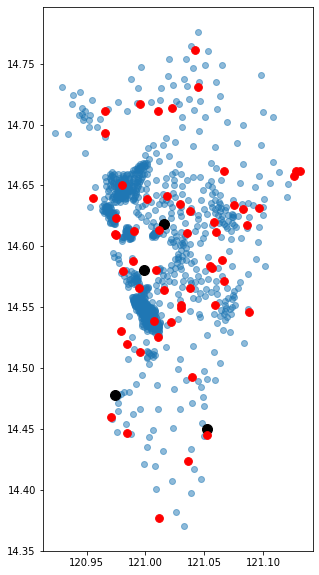

In [461]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
gdf['centroid'].plot(ax=ax,alpha=0.5)
gdf_prime1['subs'].plot(ax=ax,color='black',markersize=100)
gdf_prime2['subs'].plot(ax=ax,color='red',markersize=60)

In [431]:
subs1_df = pd.DataFrame(columns=['id','name','geom'])
for y,x in enumerate(subs1.values()):
    try:
        api = Api()
        way = api.query('way/'+str(x),includeGeometry=True,out='body')
        geo = gpd.read_file(str(way.geometry()))['geometry'][0]
        subs1_df.loc[y] = [way.id(),way.tag('name'),geo]
    except:
        print(way.tag('name'))
        pass

Zapote Substation
Zapote Substation
Zapote Substation
Zapote Substation
Zapote Substation
Zapote Substation


In [434]:
overpass = Overpass()
way = overpass.query('way["name"="Stephansdom"]; out body;')

TypeError: _queryString() got an unexpected keyword argument 'includeGeometry'

In [435]:
overpass = Overpass()
select = '"id"="149967511"' 
query = overpassQueryBuilder(area=areaId, elementType='way', selector=select, includeGeometry=True,out='body')
result = overpass.query(query)
result.countElements()

[overpass] downloading data: [timeout:25][out:json];area(3600147488)->.searchArea;(way["id"="149967511"](area.searchArea);); out body geom;


0